<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 20px; border-radius: 10px; display:flex; flex-direction: row;"> 
    <img style="width: auto; height: 80px; margin: 0; object-fit: contain;" src="https://www.freepnglogos.com/uploads/google-play-png-logo/google-changes-play-store-png-logo-0.png"/>
    <div style="flex: 1">
        <h1 style="color:white;">Android Play Store Dataset Cleaning</h1>
        <strong><a style="color:white" href="https://www.kaggle.com/lava18/google-play-store-apps">Dataset link</a></strong>
    </div>
</div>

In [590]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">1. Dataset Reading</h2>
    <strong style="color:white">dicovering the dataset and get a notion of what the attributes describe.</strong>
</div>

In [549]:
data = pd.read_csv("data/googleplaystore.csv")
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4996,AE Jewels 2: Island Adventures,GAME,4.2,652,30M,"10,000+",Free,0,Everyone,Action,"February 24, 2016",1.0,2.3 and up
9879,Passenger rights,TRAVEL_AND_LOCAL,3.9,442,2.5M,"50,000+",Free,0,Everyone,Travel & Local,"January 16, 2018",1.1.3,4.0.3 and up
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,33M,"100,000+",Free,0,Everyone,Auto & Vehicles,"July 18, 2018",1.7.1,4.0 and up
4274,J. Cole Albums (2007-2017),FAMILY,4.6,7,7.3M,"1,000+",Free,0,Mature 17+,Entertainment,"April 11, 2018",1.3,4.0.3 and up
2487,Anthem BC Anywhere,MEDICAL,2.6,496,24M,"100,000+",Free,0,Everyone,Medical,"July 27, 2018",8.0.226,4.4 and up


<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">2. Dataset Discovery</h2>
    <strong style="color:white">dicovering the dataset and get a notion of what the attributes describe.</strong>
</div>

In [550]:
data.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [551]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [552]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3. Dataset Pre-processing</h2>
    <strong style="color:white">dicovering the dataset and get a notion of what the attributes describe.</strong>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3.1 Checking for Missing values</h2>
</div>

In [553]:
data.isnull().sum(0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [554]:
data[data["Rating"].isnull()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">There are no missing reviews. However, there're missing rating values. Google play store forces you to rate an app if you're wiritng a review.<strong> Something must have gone wrong during data scraping for the rating values to be missing.</strong> We decided to leave the value as is.</p>
    </div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3.2 Checking for duplicate values</h2>
</div>

In [555]:
data.duplicated().value_counts()

False    10358
True       483
dtype: int64

In [556]:
data.drop_duplicates(inplace=True)

In [557]:
data["App"].duplicated().value_counts()

False    9660
True      698
Name: App, dtype: int64

In [558]:
duplicated_app = data[data["App"].duplicated()].sort_values("App")

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white"><strong>We found that there're still some duplicate values based on the app name. After further investigation we found that the difference is the number of reviews. So, we dropped the duplicate rows and chose the row with the highest number of reviews to keep.</strong></p>
        <p style="color:white"><strong>We first had to transform Reviews into a numeric column type and fix string values.</strong></p>
    </div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3.1 Checking for Missing values</h2>
</div>

In [559]:
data[data['Reviews'].str.contains('[a-zA-Z]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [560]:
replacement = dict(M=10**6)
data["Reviews"] = data["Reviews"].replace(replacement, regex=True).astype(int)

In [561]:
ordered_slice = data.sort_values(['App', 'Reviews'], ascending=[False, False])
data = ordered_slice.drop_duplicates(["App"])

In [562]:
data["App"].duplicated().value_counts()

False    9660
Name: App, dtype: int64

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">3.3 Data Cleaning</h2>
    <ol style="color: white; font-weight: bold;">
        <li>Change all <em>size</em> values to MB with a numeric type</li>
        <li>Remove all + signs from installs and change the column type into a numeric type</li>
        <li>Remove Dollar values from price column</li>
        <li>Engineer genres so that they're a single value per row</li>
        <li>Change formatting and type of column date</li>
    </ol>
</div>

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.3.1 Change all <em>size</em> values to MB with a numeric type</h3>
</div>

In [563]:
data["Size"].str.contains("[Mk+]").value_counts()

True     8432
False    1228
Name: Size, dtype: int64

In [564]:
data[data["Size"].str.contains("+", regex=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,1000000,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">Upon further investigation to row 10472 we found it to have a number of values that don't make sense. <strong>Thus, we decided to drop it.</strong></p>
    </div>

In [565]:
data = data.drop(10472)

In [566]:
data[data["Size"] == "Varies with device"].shape

(1228, 13)

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">Values of size are either in KB or in MB. There are however string values such as <em>varies with device</em>. There are apps that have sizes varying per device as they follow the AAB format not the APK one.<strong> We'll change all KB values to MB and <em>varies with device</em> to zero.</strong></p>
    </div>

In [567]:
data["Size"] = data.Size.replace("Varies with device", "0")

In [568]:
replacement = dict(M=1, k=0.001)
data["Size"] = data["Size"].replace("[Mk]", "", regex=True).astype(float) * data["Size"].replace(replacement, regex=True).fillna(1).astype(float)

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.3.2 Remove all + signs from <em>installs</em> and change the column type into a numeric type</h3>
</div>

In [569]:
data["Installs"] = data["Installs"].str.replace("+", "")
data["Installs"] = data["Installs"].str.replace(",", "").astype(int)

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.3.3 Remove Dollar values from price column</h3>
</div>

In [570]:
data["Price"].unique()

array(['0', '$399.99', '$1.49', '$2.99', '$1.99', '$1.20', '$0.99',
       '$4.29', '$4.99', '$4.49', '$3.99', '$10.00', '$154.99', '$1.96',
       '$5.49', '$19.40', '$5.99', '$12.99', '$2.50', '$19.99', '$2.56',
       '$9.99', '$1.04', '$2.90', '$1.00', '$2.49', '$79.99', '$8.99',
       '$16.99', '$1.97', '$3.49', '$17.99', '$6.99', '$6.49', '$2.95',
       '$4.59', '$4.85', '$7.49', '$10.99', '$4.84', '$1.76', '$7.99',
       '$29.99', '$4.60', '$3.02', '$14.99', '$39.99', '$1.70', '$15.99',
       '$24.99', '$9.00', '$1.59', '$8.49', '$1.61', '$89.99', '$74.99',
       '$15.46', '$1.26', '$400.00', '$299.99', '$379.99', '$18.99',
       '$37.99', '$389.99', '$25.99', '$3.88', '$13.99', '$2.00',
       '$30.99', '$394.99', '$11.99', '$4.77', '$3.61', '$200.00',
       '$28.99', '$46.99', '$3.28', '$3.95', '$14.00', '$2.59', '$4.80',
       '$109.99', '$1.75', '$3.90', '$1.50', '$1.29', '$2.60', '$19.90',
       '$5.00', '$3.04', '$33.99', '$3.08'], dtype=object)

In [571]:
data["Price"] = data["Price"].str.replace("$", "").astype(float)

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.3.4 Engineer genres so that they're a single value per row</h3>
</div>

In [572]:
genres = data["Genres"].unique()
genres

array(['Entertainment', 'Tools', 'Social', 'Lifestyle',
       'Video Players & Editors', 'Comics', 'Education',
       'Books & Reference', 'Communication', 'Maps & Navigation',
       'House & Home', 'Shopping', 'Simulation', 'Adventure',
       'Art & Design', 'Strategy', 'News & Magazines', 'Auto & Vehicles',
       'Action', 'Finance', 'Food & Drink', 'Arcade', 'Weather',
       'Personalization', 'Educational', 'Events', 'Medical',
       'Travel & Local', 'Sports', 'Casual', 'Puzzle', 'Dating',
       'Business', 'Productivity', 'Photography', 'Beauty',
       'Education;Education', 'Health & Fitness', 'Libraries & Demo',
       'Educational;Education', 'Casino', 'Parenting;Education', 'Trivia',
       'Entertainment;Music & Video', 'Racing;Action & Adventure',
       'Books & Reference;Creativity', 'Puzzle;Action & Adventure',
       'Card', 'Board;Pretend Play', 'Word', 'Puzzle;Brain Games',
       'Role Playing', 'Board;Action & Adventure', 'Parenting', 'Racing',
       'Arca

In [573]:
def length(x):
    return len(x.split(";"))
number_of_genres = np.vectorize(length)

In [574]:
number_of_genres(genres).max()

2

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">We found that an app has at max 2 genres. <strong>we decided to engineer 2 new features genre1 and genre2, to replace the genre feature.</strong></p>
    </div>

In [575]:
data[["genre1", "genre2"]] = data["Genres"].str.split(";", expand=True)

In [576]:
data = data.drop(columns="Genres")

#### We found some columns having the same genres
we decided to remove the values and replace them with a (None) in this case.

<div style="background-image: linear-gradient(to right, #f78ca0 0%, #f9748f 19%, #fd868c 60%, #fe9a8b 100%); padding: 20px; border-radius: 15px">
    <p style="color:white">Some columns had the same value for both genre1 and genre2 <strong>we decided to replace genre2 with None in this case.</strong></p>
    </div>

In [577]:
data.loc[data["genre1"] == data["genre2"]].shape

(36, 14)

In [578]:
data.loc[data["genre1"] == data["genre2"], "genre2"] = None
data.loc[data["genre1"] == data["genre2"]].shape

(0, 14)

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h3 style="color:white;">3.3.5 Change formatting and type of column date</h3>
</div>

In [579]:
date_expression = "(January|February|March|April|May|June|July|August|September|October|November|December)\s+\d{1,2},\s+\d{4}"
data["Last Updated"].str.contains(date_expression, regex=False).value_counts()

False    9659
Name: Last Updated, dtype: int64

In [580]:
 data["Last Updated"] = pd.to_datetime(data['Last Updated'], format='%B %d, %Y')

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">4. Dataset Visualization</h2>
    <strong style="color:white">Asking questions and aswering them.</strong>
    <ol style="color: white; font-weight: bold">
        <li>Scatter Matrix</li>
        <li>Percentage of free to paid apps</li>
        <li>Number of installs for paid vs free apps</li>
        <li>The dominant category</li>
    </ol>
</div>

In [640]:
plt.rcParams['figure.figsize']=(10,10)

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">4.1 Scatter Matrix</h2>
</div>

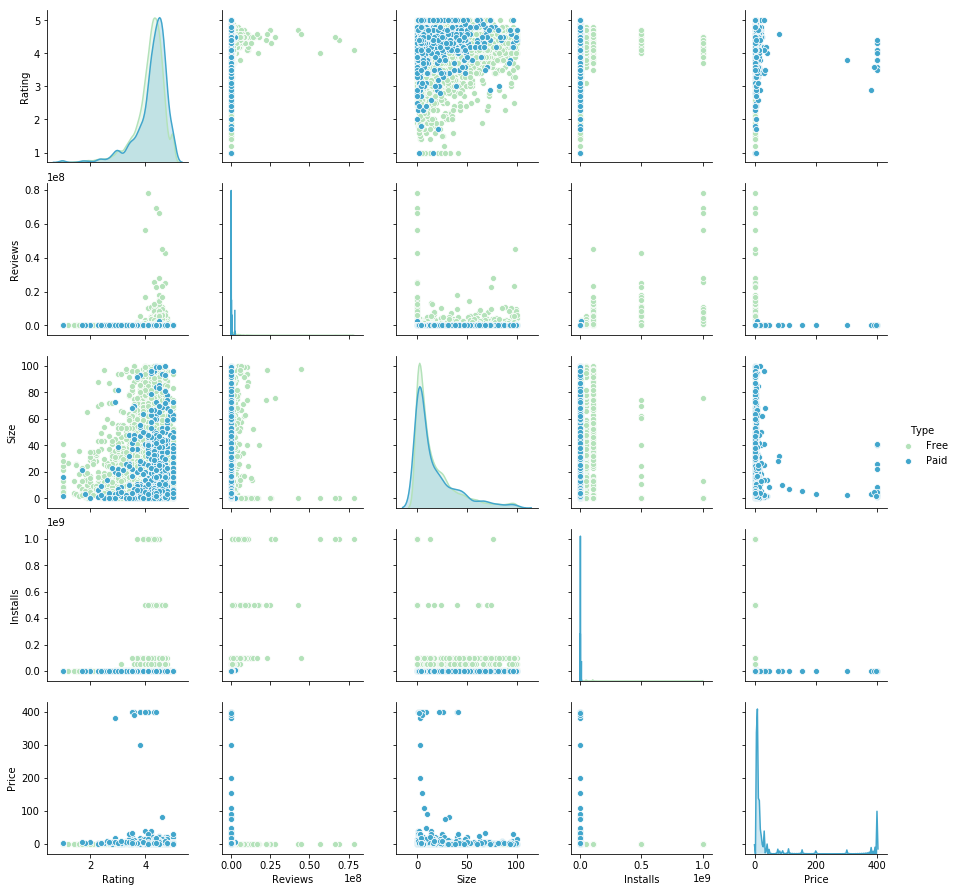

In [641]:
sns.pairplot(data, hue="Type", palette="GnBu")

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">4.2 Percentage of free to paid apps</h2>
</div>

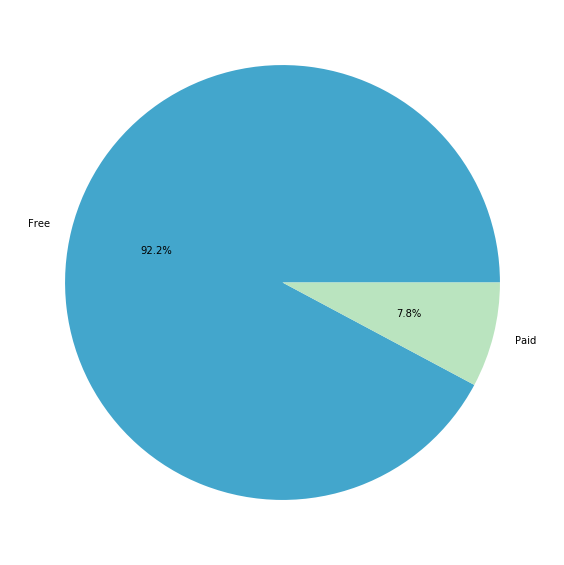

In [642]:
size = data["Type"].value_counts()
labels = data["Type"].unique()[0:2]

colors=["#43a6cc", "#bae4bf"]

plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

<div style="background-color: #FF3CAC; background-image: linear-gradient(225deg, #FF3CAC 0%, #784BA0 50%, #2B86C5 100%); padding: 15px; border-radius: 10px"> 
    <h2 style="color:white;">4.4 The dominant category</h2>
</div>

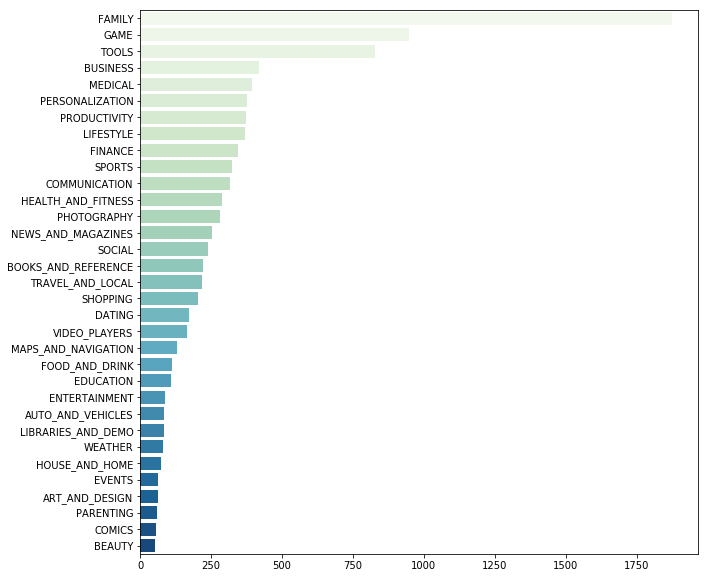

In [648]:
categories = data["Category"].value_counts()
sns.barplot(x=categories.values, y=categories.index, palette="GnBu")